## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9000,19.1000,196.0000,3550.0000,MALE,10.0237,-24.8659
1,Chinstrap,Dream,Yes,741,45.2000,17.8000,198.0000,3950.0000,FEMALE,8.8894,-24.4943
2,Gentoo,Biscoe,Yes,744,46.5000,13.5000,210.0000,4550.0000,FEMALE,7.9953,-25.3283
3,Chinstrap,Dream,Yes,10,45.2000,16.6000,191.0000,3250.0000,FEMALE,9.6236,-24.7898
4,Gentoo,Biscoe,Yes,13,48.4000,14.4000,203.0000,4625.0000,FEMALE,8.1658,-26.1397
5,Gentoo,Biscoe,Yes,22,48.1000,15.1000,209.0000,5500.0000,MALE,8.4574,-26.2266
6,Gentoo,Biscoe,Yes,13,51.1000,16.5000,225.0000,5250.0000,MALE,8.2066,-26.3686
7,Gentoo,Biscoe,No,392,42.7000,13.7000,208.0000,3950.0000,FEMALE,8.1457,-26.5947
8,Adelie,Biscoe,Yes,14,39.6000,20.7000,191.0000,3900.0000,FEMALE,8.8097,-26.7896
9,Gentoo,Biscoe,Yes,735,46.1000,13.2000,211.0000,4500.0000,FEMALE,7.9930,-25.5139


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [50]:
data = data.dropna()
data = data[data['Sex'] != '.']
dum_data = pd.get_dummies(data.drop('Species', axis=1), drop_first=True)
dum_data.head(10)

,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,382,50.9000,19.1000,196.0000,3550.0000,10.0237,-24.8659,True,False,True,True
1,741,45.2000,17.8000,198.0000,3950.0000,8.8894,-24.4943,True,False,True,False
2,744,46.5000,13.5000,210.0000,4550.0000,7.9953,-25.3283,False,False,True,False
3,10,45.2000,16.6000,191.0000,3250.0000,9.6236,-24.7898,True,False,True,False
4,13,48.4000,14.4000,203.0000,4625.0000,8.1658,-26.1397,False,False,True,False
5,22,48.1000,15.1000,209.0000,5500.0000,8.4574,-26.2266,False,False,True,True
6,13,51.1000,16.5000,225.0000,5250.0000,8.2066,-26.3686,False,False,True,True
7,392,42.7000,13.7000,208.0000,3950.0000,8.1457,-26.5947,False,False,False,False
8,14,39.6000,20.7000,191.0000,3900.0000,8.8097,-26.7896,False,False,True,False
9,735,46.1000,13.2000,211.0000,4500.0000,7.9930,-25.5139,False,False,True,False


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [51]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']], dtype=np.int_)
y_enc = enc.fit_transform(data[['Species']])
y = pd.DataFrame(y_enc, columns=['Species'])
y.head(10)

,Species
0,0
1,0
2,1
3,0
4,1
5,1
6,1
7,1
8,2
9,1


In [52]:
# Сразу подготовим x для задания 1.3
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x1 = dum_data[['Flipper Length (mm)', 'Body Mass (g)']]
x1 = pd.DataFrame(ss.fit_transform(x1), columns = x1.columns)

x = pd.DataFrame(ss.fit_transform(dum_data), columns = dum_data.columns)
x.head(10)

,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_MALE
0,0.0893,1.2512,1.0042,-0.3743,-0.8217,2.3290,1.0420,1.3125,-0.3912,0.3424,1.0062
1,1.3130,0.2095,0.3424,-0.2308,-0.3267,0.2712,1.5126,1.3125,-0.3912,0.3424,-0.9938
2,1.3232,0.4471,-1.8467,0.6303,0.4159,-1.3509,0.4564,-0.7619,-0.3912,0.3424,-0.9938
3,-1.1788,0.2095,-0.2685,-0.7330,-1.1930,1.6030,1.1383,1.3125,-0.3912,0.3424,-0.9938
4,-1.1685,0.7943,-1.3885,0.1280,0.5087,-1.0416,-0.5712,-0.7619,-0.3912,0.3424,-0.9938
5,-1.1379,0.7395,-1.0321,0.5585,1.5916,-0.5126,-0.6813,-0.7619,-0.3912,0.3424,1.0062
6,-1.1685,1.2877,-0.3194,1.7065,1.2822,-0.9676,-0.8611,-0.7619,-0.3912,0.3424,1.0062
7,0.1234,-0.2473,-1.7448,0.4868,-0.3267,-1.0781,-1.1474,-0.7619,-0.3912,-2.9205,-0.9938
8,-1.1651,-0.8138,1.8187,-0.7330,-0.3886,0.1265,-1.3942,-0.7619,-0.3912,0.3424,-0.9938
9,1.2925,0.3740,-1.9994,0.7020,0.3540,-1.3551,0.2214,-0.7619,-0.3912,0.3424,-0.9938


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17, stratify=y)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=17, stratify=y)

Важно использовать stratify чтобы сохранилось соотношение классов в выборках

Без этого нельзя адекватно сравнивать показатели на тренировочной и тестовой выборках, потому что, к примеру, совершенно разные показатели могут оказаться не признаком переобучения, а симптомом дисбаланса классов

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [75]:
from sklearn.neighbors import KNeighborsClassifier

k = [1, 3, 5, 10, 15, 25]
models = []
results = []

for i in range(6):
    knn = KNeighborsClassifier(n_neighbors=k[i], metric='euclidean')
    knn.fit(x1_train, y1_train.values.ravel())
    results.append([k[i],
                    knn.score(x1_train, y1_train),
                    knn.score(x1_test, y1_test)])
    models.append(knn)

results_df = pd.DataFrame(results ,columns=['k', 'Train', 'Test'])
results_df

,k,Train,Test
0,1,0.9823,0.7653
1,3,0.8717,0.7755
2,5,0.8363,0.7857
3,10,0.8186,0.7653
4,15,0.8407,0.8061
5,25,0.8230,0.8061


Получили интересный результат - при k=1 точность на трейне не равна единице

Это показывает, что мы отбросили некоторые параметры, которые помогали разграничить разные классы даже при одинаковых длине плавника и массе

Тем не менее ошибка всё ещё является не такой большой, так что и по двум параметрам можно достаточно неплохо классы разграничить

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [55]:
#!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [56]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

C:\Users\ok__\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ok__\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ok__\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ok__\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ok__\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\va

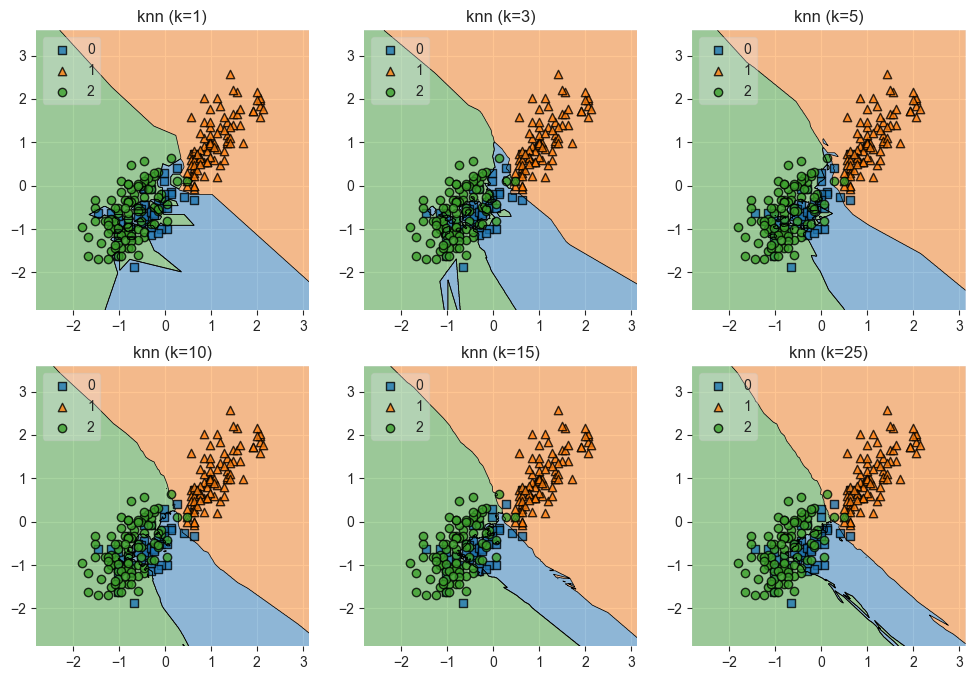

In [57]:
fig = plt.figure(figsize = (12, 8))
gs = gridspec.GridSpec(2, 3)
grd = [x for x in itertools.product([0, 1, 2], repeat=2) if x[0] != 2]

labels = [f'knn (k={kn})' for kn in k]
for i in range(6):
    ax = plt.subplot(gs[i])
    fig = plot_decision_regions(
        X=x1_train.values,
        y=y1_train['Species'].values.ravel(),
        clf=models[i],
        ax=ax,
        legend=2)
    plt.title(labels[i])

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Лучший результат показывают k = 15 и k = 25, так как на них наибольшая точность

На более маленьких значениях k точность на обучающей выборке сильно больше точности на тестовой, что сигнализирует о переобучении при малых k (сильнее всего это заметно при k=1)

При этом если сравнивать k=15 и k=25, то области на графике при k=25 имеют достаточно резкие и рваные края, при k=15 они более гладкие. Ввиду этого k=15 лучше

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

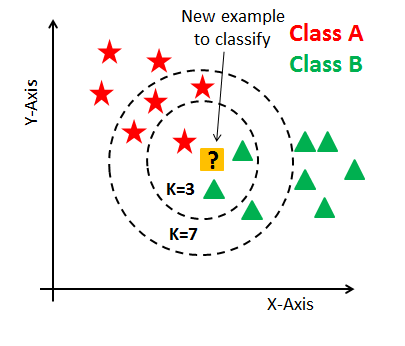

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [58]:
import numpy as np
from collections import Counter
from scipy.spatial.distance import cdist

class KNN:
    def __init__(self, k:int):
        self.k = k
        self.x, self.y = None, None

    def fit(self, X, y):
        # (⌒_⌒;)
        self.x = X
        self.y = y

    def find_y_by_distances(self, distances):
        ind = np.argsort(distances)
        y_ranked = np.take_along_axis(self.y, ind, axis=0)
        return Counter(y_ranked[:self.k]).most_common(1)[0][0]

    def predict(self, X):
        # (＠_＠)
        result = []
        distances = self.count_distance(X, self.x)
        for dist in distances:
            result.append(self.find_y_by_distances(dist))

        return np.array(result)


    def count_distance(self, x, y):
        # ヽ(♡‿♡)ノ
        return cdist(x, y, 'euclidean')


In [59]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [76]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [77]:
k = [1, 3, 5, 10, 15, 25]
results = []

for i in range(6):
    knn = KNN(k[i])
    knn.fit(x_train, y_train.values.ravel())
    results.append([k[i],
                    np.mean(knn.predict(x_train) == y_train.values.ravel()),
                    np.mean(knn.predict(x_test) == y_test.values.ravel())]
                   )

results_df = pd.DataFrame(results ,columns=['k', 'Train', 'Test'])
results_df

,k,Train,Test
0,1,1.0000,0.9898
1,3,0.9956,0.9796
2,5,0.9956,0.9796
3,10,1.0000,0.9694
4,15,0.9867,0.9796
5,25,0.9867,0.9694


Лучший вариант достигается при k=1, что достаточно необычно, поскольку обычно такой вариант чересчур переобученный

По этой причине действительно стоит использовать либо его, либо второй лучший: k = 3 или 15

В целом значения получились очень классненькие, я вообще умничка

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [62]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.2300,Ideal,E,SI2,61.5000,55.0000,326,3.9500,3.9800,2.4300
1,2,0.2100,Premium,E,SI1,59.8000,61.0000,326,3.8900,3.8400,2.3100
2,3,0.2300,Good,E,VS1,56.9000,65.0000,327,4.0500,4.0700,2.3100
3,4,0.2900,Premium,I,VS2,62.4000,58.0000,334,4.2000,4.2300,2.6300
4,5,0.3100,Good,J,SI2,63.3000,58.0000,335,4.3400,4.3500,2.7500


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [63]:
data.dropna(inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2300,Ideal,E,SI2,61.5000,55.0000,326,3.9500,3.9800,2.4300
1,0.2100,Premium,E,SI1,59.8000,61.0000,326,3.8900,3.8400,2.3100
2,0.2300,Good,E,VS1,56.9000,65.0000,327,4.0500,4.0700,2.3100
3,0.2900,Premium,I,VS2,62.4000,58.0000,334,4.2000,4.2300,2.6300
4,0.3100,Good,J,SI2,63.3000,58.0000,335,4.3400,4.3500,2.7500
5,0.2400,Very Good,J,VVS2,62.8000,57.0000,336,3.9400,3.9600,2.4800
6,0.2400,Very Good,I,VVS1,62.3000,57.0000,336,3.9500,3.9800,2.4700
7,0.2600,Very Good,H,SI1,61.9000,55.0000,337,4.0700,4.1100,2.5300
8,0.2200,Fair,E,VS2,65.1000,61.0000,337,3.8700,3.7800,2.4900
9,0.2300,Very Good,H,VS1,59.4000,61.0000,338,4.0000,4.0500,2.3900


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [64]:
corr_with_k = data.corrwith(data['price'], numeric_only=True)
corr_with_k

carat    0.9216
depth   -0.0106
table    0.1271
price    1.0000
x        0.8844
y        0.8654
z        0.8612
dtype: float64

Наибольшая корелляция с price у carat и x,y,z.

Что интересно, depth с price почти не кореллирует, его бы можно было спокойно убрать

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [65]:
from sklearn.preprocessing import OrdinalEncoder

cut_enc = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']], dtype=np.int_)
data['cut'] = cut_enc.fit_transform(data[['cut']])
y = data['price']
data = pd.get_dummies(data.drop('price', axis=1), drop_first=True)
data

,carat,cut,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.2300,4,61.5000,55.0000,3.9500,3.9800,2.4300,True,False,False,False,False,False,False,False,True,False,False,False,False
1,0.2100,3,59.8000,61.0000,3.8900,3.8400,2.3100,True,False,False,False,False,False,False,True,False,False,False,False,False
2,0.2300,1,56.9000,65.0000,4.0500,4.0700,2.3100,True,False,False,False,False,False,False,False,False,True,False,False,False
3,0.2900,3,62.4000,58.0000,4.2000,4.2300,2.6300,False,False,False,False,True,False,False,False,False,False,True,False,False
4,0.3100,1,63.3000,58.0000,4.3400,4.3500,2.7500,False,False,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.7200,4,60.8000,57.0000,5.7500,5.7600,3.5000,False,False,False,False,False,False,False,True,False,False,False,False,False
53936,0.7200,1,63.1000,55.0000,5.6900,5.7500,3.6100,False,False,False,False,False,False,False,True,False,False,False,False,False
53937,0.7000,2,62.8000,60.0000,5.6600,5.6800,3.5600,False,False,False,False,False,False,False,True,False,False,False,False,False
53938,0.8600,3,61.0000,58.0000,6.1500,6.1200,3.7400,False,False,False,True,False,False,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [66]:
train_x, test_x, train_y, test_y = train_test_split(data, y, test_size=0.3, random_state=17)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

float_columns = train_x.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
ct = ColumnTransformer([
    ('train_tr', scaler, float_columns)],
)
train_x[float_columns] = ct.fit_transform(train_x)
test_x[float_columns] = ct.fit_transform(test_x)
train_x

,carat,cut,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
43455,-0.6297,3,0.8747,0.6909,-0.6442,-0.6507,-0.5501,True,False,False,False,False,False,False,True,False,False,False,False,False
46421,-0.2918,2,-0.3133,-0.1154,-0.1267,-0.0658,-0.1268,True,False,False,False,False,False,False,False,True,False,False,False,False
25131,1.5034,2,0.5253,0.2430,1.3364,1.3395,1.3968,False,False,True,False,False,False,False,False,False,True,False,False,False
17365,0.4474,1,1.5036,0.6909,0.5424,0.5015,0.7055,True,False,False,False,False,False,False,False,False,False,True,False,False
27858,-1.0521,4,0.1060,-1.0560,-1.2687,-1.2181,-1.2131,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42297,-1.0098,4,0.1758,-1.1008,-1.2063,-1.1657,-1.1567,False,False,False,True,False,False,False,False,False,False,True,False,False
33174,-0.8198,3,-1.5712,2.0347,-0.7959,-0.8165,-0.9451,True,False,False,False,False,False,False,False,True,False,False,False,False
46470,-0.4607,4,-0.5929,-0.6529,-0.2784,-0.3015,-0.3526,False,True,False,False,False,False,False,False,True,False,False,False,False
34959,-1.0098,3,0.6650,0.2430,-1.2509,-1.2093,-1.1567,False,False,False,True,False,False,False,False,False,False,True,False,False


Скейлинг численных признаков позволяет впоследствии адекватно сравнивать присвоенные им моделью веса

К примеру, если до этого цена измерялась миллионами, а вес граммами, то коэффициенты линрега бы, скорее всего, тоже имели бы разные порядки. Теперь же порядки должны быть одинаковы и в результате больший коэффициент действительно будет означать большую значимость признака для результата

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression()
lr.fit(train_x, train_y)
train_res, test_res = lr.predict(train_x), lr.predict(test_x)

pd.set_option('display.float_format', '{:.4f}'.format)
results_df = pd.DataFrame({
    'Metric': ['MSE on train', 'MSE on test', 'Score on train', 'Score on test'],
    'Linear Regression': [
        mse(train_y, train_res),
        mse(test_y, test_res),
        lr.score(train_x, train_y),
        lr.score(test_x, test_y)
    ]
})
results_df

,Metric,Linear Regression
0,MSE on train,1281229.0095
1,MSE on test,1289402.8873
2,Score on train,0.9195
3,Score on test,0.9190


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [69]:
coefs = pd.DataFrame(lr.coef_.reshape(1, 20), columns=train_x.columns, index = ['LinReg'])
coefs

,carat,cut,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
LinReg,5371.8091,101.4800,-114.7719,-63.5547,-1178.1478,13.3030,-28.2537,-210.2181,-280.9868,-486.0863,-991.6883,-1482.1916,-2363.9745,5396.2029,3718.6895,2733.4310,4623.5930,4317.1945,5058.9422,5009.2594


In [70]:
row = coefs.iloc[0].abs()
display(row.sort_values(ascending=False).head(10).index)

Index(['clarity_IF', 'carat', 'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1',
       'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'color_J', 'color_I'],
      dtype='object')

Можно увидеть, что наиболее значимыми модель посчитала коэффициенты перед чистотой камня, затем идёт цвет, затем количество карат, затем некий cut (я не эксперт по камешкам :( )

Что интересно, предыдущее предположение о том, что корелляция depth c конечной переменной слишком маленькая и что depth из-за этого можно убрать оказалось неверным. Видимо, 0.01 это не такое уж и маленькое значение корелляции

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [71]:
from sklearn.linear_model import Lasso, Ridge
lasso, ridge = Lasso(10), Ridge(10)
lasso.fit(train_x, train_y)
ridge.fit(train_x, train_y)

coefs.loc['Lasso'] = lasso.coef_
coefs.loc['Ridge'] = ridge.coef_
coefs

,carat,cut,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
LinReg,5371.8091,101.4800,-114.7719,-63.5547,-1178.1478,13.3030,-28.2537,-210.2181,-280.9868,-486.0863,-991.6883,-1482.1916,-2363.9745,5396.2029,3718.6895,2733.4310,4623.5930,4317.1945,5058.9422,5009.2594
Lasso,4780.2966,132.4911,-115.3773,-64.2762,-712.3616,-0.0000,-12.9473,0.0000,-0.0000,-122.1969,-617.0581,-1022.2048,-1766.6206,1303.9342,0.0000,-819.9516,809.6897,566.3219,1145.0264,1165.1522
Ridge,5319.4258,105.6778,-117.3684,-65.7152,-1138.2450,15.4451,-30.5370,-197.9565,-267.5041,-468.2870,-974.2769,-1457.5135,-2326.4742,4805.5434,3174.0821,2196.1072,4069.4078,3768.5039,4490.8024,4448.6928


Веса действительно стали значительно меньше, особенно при L1-регуляризации, некоторые и вовсе занулились, что говорит о том, что проблема мультиколлинеарности действительно присутствовала (ещё сильнее она бы проявила себя если бы при one-hot кодировании мы не указывали drop_first=True)

In [72]:
# Чисто ради интереса
from sklearn.metrics import mean_squared_error as mse
l_train_res, l_test_res = lasso.predict(train_x), lasso.predict(test_x)
r_train_res, r_test_res = ridge.predict(train_x), ridge.predict(test_x)
results_df['Lasso'] = [
    mse(train_y, l_train_res),
    mse(test_y, l_test_res),
    lasso.score(train_x, train_y),
    lasso.score(test_x, test_y)
]
results_df['Ridge'] = [
    mse(train_y, r_train_res),
    mse(test_y, r_test_res),
    ridge.score(train_x, train_y),
    ridge.score(test_x, test_y)
]
results_df

,Metric,Linear Regression,Lasso,Ridge
0,MSE on train,1281229.0095,1497841.0245,1285358.6904
1,MSE on test,1289402.8873,1517034.7942,1295530.3759
2,Score on train,0.9195,0.9059,0.9192
3,Score on test,0.9190,0.9047,0.9187


**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

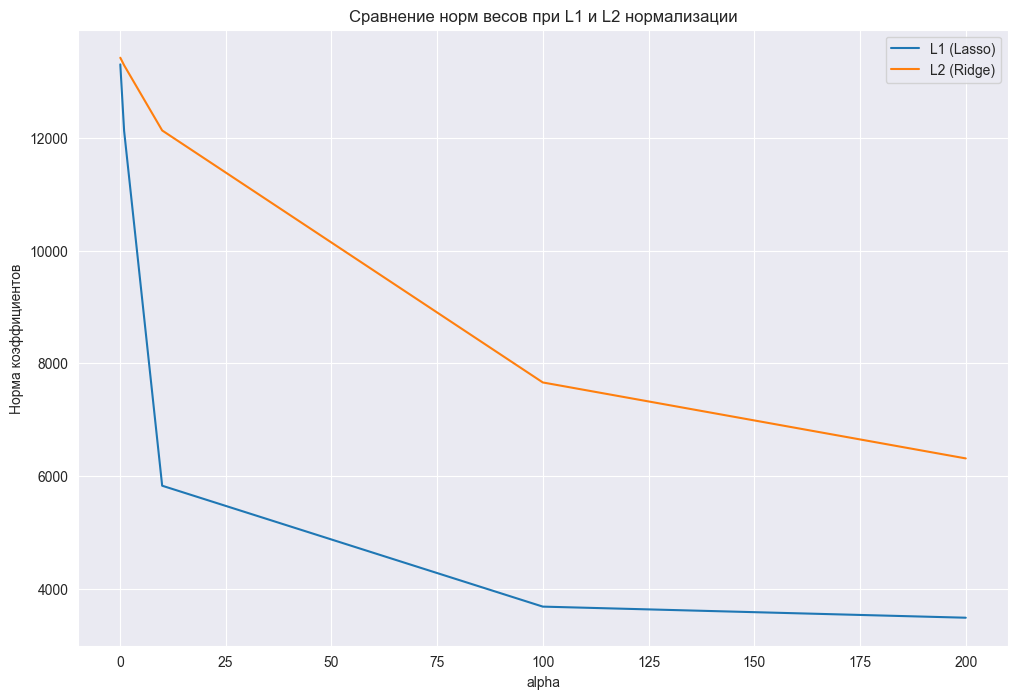

In [73]:
alphas = [0.1, 1, 10, 100, 200]
norms_lasso = []
norms_ridge = []
for alpha in alphas:
    ls = Lasso(alpha)
    ls.fit(train_x, train_y)
    norms_lasso.append(np.linalg.norm(ls.coef_))
    
    rg = Ridge(alpha)
    rg.fit(train_x, train_y)
    norms_ridge.append(np.linalg.norm(rg.coef_))
    
plt.figure(figsize=(12, 8))
plt.title('Сравнение норм весов при L1 и L2 нормализации')
plt.plot(alphas, norms_lasso, label='L1 (Lasso)')
plt.plot(alphas, norms_ridge, label='L2 (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Норма коэффициентов')
plt.legend()
plt.show()

При L1-регуляризации Наиболее резкое падение произошло при изменении альфы от 0 до 10, затем достаточно большое изменение наблюдается при переходе к alpha=100. Дальше норма почти не изменяется

L2 показывает похожую картину, но с более умеренным убывает коэффициентов

В целом коэффициенты сильнее уменьшает Lasso, некоторые и вовсе зануляются. Именно поэтому его используют для отбора признаков - те, у которых вес 0 можно смело убирать. Главное не сделать альфу слишком большой, потому что в таком случае модель совсем перестаёт зависеть от обучающих данных и стремится только к меньшим коэффициентам

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [74]:
from sklearn.linear_model import LassoCV

lcv = LassoCV(cv=5, alphas=alphas)
lcv.alphas_ = alphas
lcv.fit(train_x, train_y)
mean_mse = lcv.mse_path_.mean(axis=1)

df = pd.DataFrame({
    'Alpha': lcv.alphas_,
    'Mean mse': mean_mse
})
display(df)
display(f'Наименьшее MSE достигается при alpha = {df.loc[df['mean_mse'].idxmin(), 'alpha']}')

C:\Users\ok__\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1288087434.292862, tolerance: 48471156.19621053
  model = cd_fast.enet_coordinate_descent_gram(


,Alpha,Mean mse
0,200.0000,2400254.3836
1,100.0000,2199710.6503
2,10.0000,1500408.4838
3,1.0000,1290010.9466
4,0.1000,1301076.2566


KeyError: 'mean_mse'

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [46]:
ls = Lasso(alpha=1)
ls.fit(train_x, train_y)
ls_coefs = pd.DataFrame(ls.coef_.reshape(1, 20), columns=train_x.columns, index = ['Alpha=1'])
ls_coefs

,carat,cut,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
Alpha=1,5309.4227,105.4833,-116.4090,-64.2804,-1119.9763,0.0000,-24.6978,-157.0940,-226.5850,-428.2920,-933.0264,-1414.5279,-2281.8107,4819.3072,3182.0573,2202.5215,4076.1228,3776.8343,4499.9204,4458.3753


Занулился только коэффициент y. Видимо, три координаты (x,y,z) являются зависимыми друг от друга, из-за чего значений только x и z достаточно

В остальном полезность признаков совпадает с описанной выше, до использования регуляризации

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [47]:
preds = ls.predict(test_x)
standart_mse = mse(test_y, test_res)
reg_mse = mse(test_y, preds)
display(f'Ошибка без регуляризации: {standart_mse}')
display(f'Ошибка с регуляризацией: {reg_mse}')

'Ошибка без регуляризации: 1289402.8872723046'

'Ошибка с регуляризацией: 1295639.1458962944'

Как можно увидеть, в данном случае регуляризация только ухудшила модель. Это значит, что изначально модель уже была достаточно хороша и больших проблем с мультиколлинеарностью не было; попытками же её исправить мы только увели модель от стремления улучшить свои предсказания

В результате лучше использовать стандартную нерегуляризованную модель